In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
from fbprophet import Prophet
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(file)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [3]:
df['ppm_fixed'] = df.ppm[df.ppm > 0]
df.ppm_fixed.fillna(method = "backfill", inplace=True)

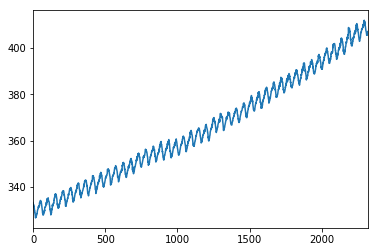

In [4]:
df.ppm_fixed.plot()

In [5]:
train = df[df.year < 2010]
test =  df[df.year >= 2010]

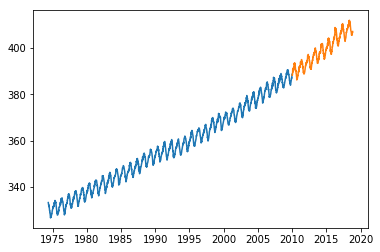

In [6]:
plt.plot(train.date, train.ppm_fixed)
plt.plot(test.date, test.ppm_fixed)

# Prophet

In [7]:
fb_df = train[['date', 'ppm_fixed']].copy()
fb_df.columns = ['ds', 'y']
fb_df.head()

,ds,y
0,1974-05-19,333.34
1,1974-05-26,332.95
2,1974-06-02,332.32
3,1974-06-09,332.18
4,1974-06-16,332.37


In [8]:
m = Prophet()
m.fit(fb_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=len(test), freq='W', include_history=False)
future.head()

,ds
0,2010-01-03
1,2010-01-10
2,2010-01-17
3,2010-01-24
4,2010-01-31


In [10]:
forecast = m.predict(future)

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-03,388.641156,387.950945,388.991000,388.641156,388.641156,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,-0.172904,0.0,0.0,0.0,388.468252
1,2010-01-10,388.679144,388.163843,389.199175,388.679144,388.679144,0.020884,0.020884,0.020884,0.020884,0.020884,0.020884,0.0,0.0,0.0,388.700029
2,2010-01-17,388.717133,388.399442,389.474175,388.717133,388.717133,0.204730,0.204730,0.204730,0.204730,0.204730,0.204730,0.0,0.0,0.0,388.921863
3,2010-01-24,388.755121,388.627521,389.650158,388.755121,388.755121,0.366814,0.366814,0.366814,0.366814,0.366814,0.366814,0.0,0.0,0.0,389.121935
4,2010-01-31,388.793109,388.809614,389.815969,388.793109,388.793109,0.503869,0.503869,0.503869,0.503869,0.503869,0.503869,0.0,0.0,0.0,389.296978


In [15]:
def mae_prophet(yr_season, wk_season):
    m = Prophet(yearly_seasonality=yr_season, weekly_seasonality=wk_season, daily_seasonality=False)
    m.fit(fb_df)
    forecast = m.predict(future)
    return mae(forecast.yhat, test.ppm_fixed)

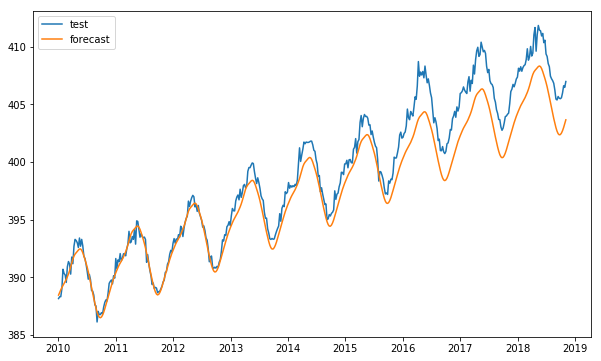

In [13]:
plt.figure(figsize=(10, 6))
# plt.plot(train.date, train.ppm_fixed, label='train')
plt.plot(test.date, test.ppm_fixed, label='test')
plt.plot(test.date, forecast.yhat, label='forecast')
plt.legend();

In [16]:
for yr, wk in itertools.product([True, False], repeat=2):
    print(yr, wk, mae_prophet(yr_season=yr, wk_season=wk))

True True 1.4773120142345337
True False 1.46864643676106
False True 2.4083986645614726
False False 2.4102838301730847
